In [76]:
import pandas as pd

df1 = pd.read_csv('/content/drive/MyDrive/datasets/netflix_movies_6.csv')
df2 = pd.read_csv('/content/drive/MyDrive/datasets/NFLX_market_6.csv')

print(df1.head())
print(df2.head())

       Date                                   Title      Genre
0  30-06-22                    Sharkdog (TV Series)  TV Series
1  29-06-22                                 Beauty     Romance
2  29-06-22  Pirate Gold of Adak Island (TV Series)  TV Series
3  29-06-22                 The Upshaws (TV Series)  TV Series
4  28-06-22                                Blasted      Action
       Date        Open       Close
0  01-04-22  376.799988  373.470001
1  04-04-22  373.549988  391.500000
2  05-04-22  389.299988  380.149994
3  06-04-22  374.149994  368.350006
4  07-04-22  365.000000  362.149994


In [77]:
df = pd.merge(df1, df2, on='Date')
df

,Date,Title,Genre,Open,Close
0,29-06-22,Beauty,Romance,179.550003,178.360001
1,29-06-22,Pirate Gold of Adak Island (TV Series),TV Series,179.550003,178.360001
2,29-06-22,The Upshaws (TV Series),TV Series,179.550003,178.360001
3,28-06-22,Blasted,Action,189.199997,179.600006
4,28-06-22,Cristela Alonzo: Middle Classy (TV),Documentary,189.199997,179.600006
...,...,...,...,...,...
152,01-04-22,Cocomelon (TV Series),TV Series,376.799988,373.470001
153,01-04-22,Battle: Freestyle,Drama,376.799988,373.470001
154,01-04-22,The Last Bus (TV Series),TV Series,376.799988,373.470001
155,01-04-22,Celeb Five: Behind the Curtain,Comedy,376.799988,373.470001


<Axes: >

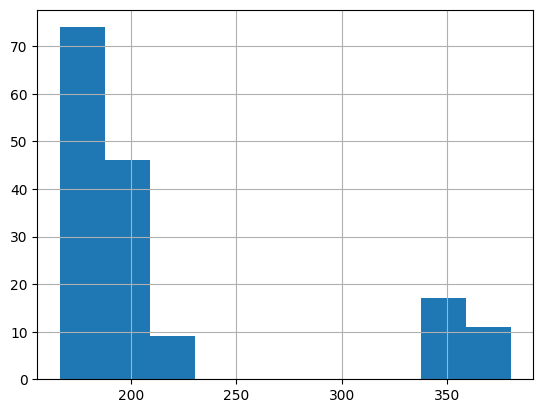

In [78]:
df['Close'].hist()

In [79]:
df.describe()

,Open,Close
count,157.000000,157.000000
mean,219.364712,218.772930
std,67.795747,66.826323
min,163.960007,166.369995
25%,179.550003,180.970001
50%,189.169998,188.320007
75%,202.089996,204.009995
max,389.299988,380.149994


In [80]:
df

,Date,Title,Genre,Open,Close
0,29-06-22,Beauty,Romance,179.550003,178.360001
1,29-06-22,Pirate Gold of Adak Island (TV Series),TV Series,179.550003,178.360001
2,29-06-22,The Upshaws (TV Series),TV Series,179.550003,178.360001
3,28-06-22,Blasted,Action,189.199997,179.600006
4,28-06-22,Cristela Alonzo: Middle Classy (TV),Documentary,189.199997,179.600006
...,...,...,...,...,...
152,01-04-22,Cocomelon (TV Series),TV Series,376.799988,373.470001
153,01-04-22,Battle: Freestyle,Drama,376.799988,373.470001
154,01-04-22,The Last Bus (TV Series),TV Series,376.799988,373.470001
155,01-04-22,Celeb Five: Behind the Curtain,Comedy,376.799988,373.470001


In [81]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['Genre'] = encoder.fit_transform(df['Genre'])
df

,Date,Title,Genre,Open,Close
0,29-06-22,Beauty,5,179.550003,178.360001
1,29-06-22,Pirate Gold of Adak Island (TV Series),7,179.550003,178.360001
2,29-06-22,The Upshaws (TV Series),7,179.550003,178.360001
3,28-06-22,Blasted,0,189.199997,179.600006
4,28-06-22,Cristela Alonzo: Middle Classy (TV),3,189.199997,179.600006
...,...,...,...,...,...
152,01-04-22,Cocomelon (TV Series),7,376.799988,373.470001
153,01-04-22,Battle: Freestyle,4,376.799988,373.470001
154,01-04-22,The Last Bus (TV Series),7,376.799988,373.470001
155,01-04-22,Celeb Five: Behind the Curtain,2,376.799988,373.470001


In [82]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

vecs = pd.DataFrame(vectorizer.fit_transform(df['Title']).todense().tolist(), columns=vectorizer.get_feature_names_out())
df = df.drop(columns=['Title'])
df = pd.concat([df, vecs], axis=1)
df.drop('Date', axis=1, inplace=True)
df

,Genre,Open,Close,10½,1958,245,365,42,abercrombie,about,...,williams,with,word,world,wrath,yakamoz,yaksha,year,you,your
0,5,179.550003,178.360001,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,179.550003,178.360001,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,179.550003,178.360001,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,189.199997,179.600006,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,189.199997,179.600006,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,7,376.799988,373.470001,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
153,4,376.799988,373.470001,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
154,7,376.799988,373.470001,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
155,2,376.799988,373.470001,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df, df['Close'], test_size=0.2)
X_train

,Genre,Open,Close,10½,1958,245,365,42,abercrombie,about,...,williams,with,word,world,wrath,yakamoz,yaksha,year,you,your
8,7,183.500000,190.850006,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112,2,198.679993,190.360001,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,7,170.750000,178.889999,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,7,200.139999,198.979996,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
124,2,220.000000,218.220001,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,3,176.089996,166.369995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
155,2,376.799988,373.470001,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
75,3,186.720001,177.190002,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101,7,197.649994,204.009995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 1.00
